In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("/home/aditya/Downloads/tensorflow/Udemy_Projects/HousePricePrediction_Hypothesis_Testing/real_estate.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        418 non-null    float64
 1   MRT_dist   417 non-null    float64
 2   stores     417 non-null    float64
 3   latitude   418 non-null    float64
 4   longitude  418 non-null    float64
 5   price      418 non-null    float64
 6   year       418 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 23.0 KB


In [3]:
df.head()

,age,MRT_dist,stores,latitude,longitude,price,year
0,30.4,1735.5950,2.0,24.96464,121.51623,25.9,2012
1,32.7,392.4459,6.0,24.96398,121.54250,30.5,2012
2,15.5,815.9314,4.0,24.97886,121.53464,37.4,2012
3,34.5,623.4731,7.0,24.97933,121.53642,40.3,2012
4,23.0,130.9945,6.0,24.95663,121.53765,37.2,2012


In [4]:
# Checking for NULL values
df[df.isna().any(axis=1)]

,age,MRT_dist,stores,latitude,longitude,price,year
30,7.1,NaN,3.0,24.96942,121.53764,43.2,2012
131,24.3,265.67,NaN,24.87235,121.51564,27.6,2013


In [5]:
# Deleting NULL values
df.dropna(how="any", inplace=True)
df.head()

,age,MRT_dist,stores,latitude,longitude,price,year
0,30.4,1735.5950,2.0,24.96464,121.51623,25.9,2012
1,32.7,392.4459,6.0,24.96398,121.54250,30.5,2012
2,15.5,815.9314,4.0,24.97886,121.53464,37.4,2012
3,34.5,623.4731,7.0,24.97933,121.53642,40.3,2012
4,23.0,130.9945,6.0,24.95663,121.53765,37.2,2012


In [6]:
# Checking for Duplicate values
df[df.duplicated(keep=False)]

,age,MRT_dist,stores,latitude,longitude,price,year
243,17.0,1485.097,4.0,24.97073,121.517,30.7,2013
252,17.0,1485.097,4.0,24.97073,121.517,30.7,2013
253,17.0,1485.097,4.0,24.97073,121.517,30.7,2013


In [7]:
# Deleting Duplicate records
df.drop_duplicates(keep="first", inplace=True)

df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        414 non-null    float64
 1   MRT_dist   414 non-null    float64
 2   stores     414 non-null    float64
 3   latitude   414 non-null    float64
 4   longitude  414 non-null    float64
 5   price      414 non-null    float64
 6   year       414 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [8]:
df.describe()

,age,MRT_dist,stores,latitude,longitude,price,year
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000


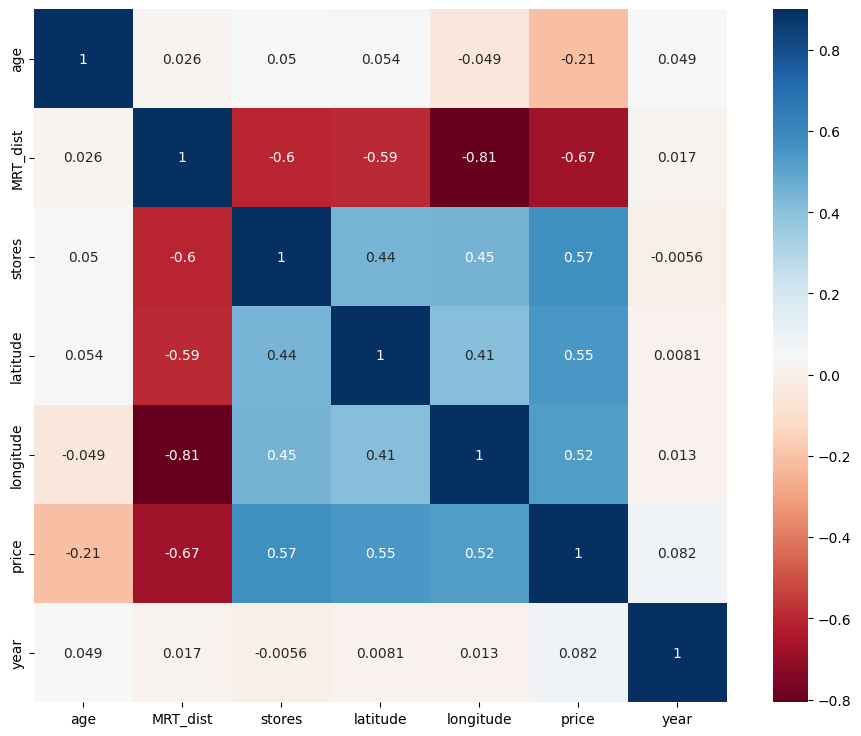

In [9]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=0.9, square=True, annot=True, cmap="RdBu")
plt.show()

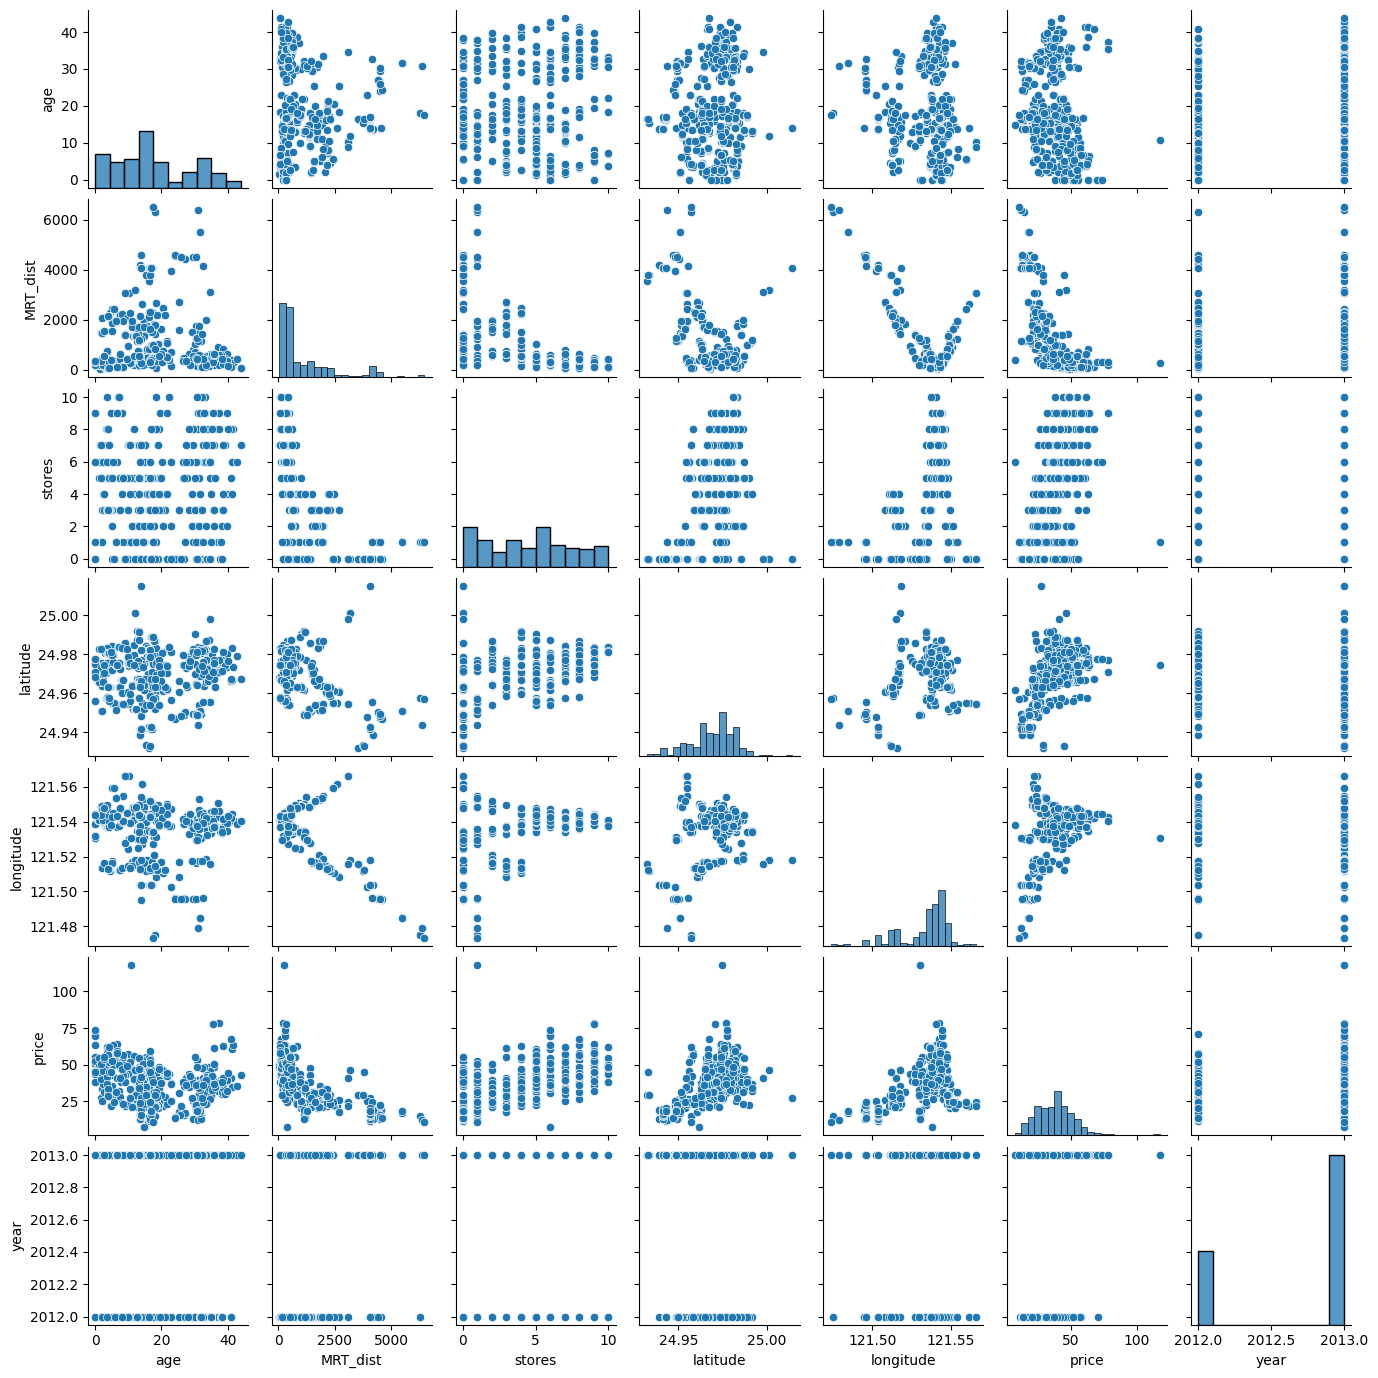

In [10]:
sns.pairplot(df, height=2)
plt.show()

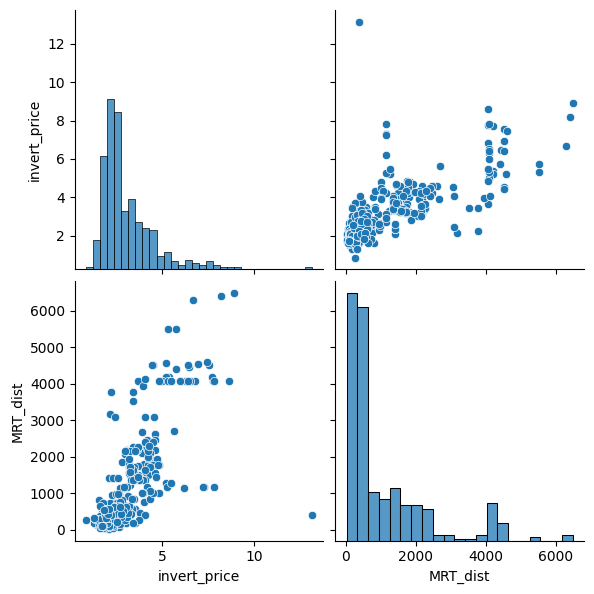

In [11]:
df["invert_price"] = 1 / df["price"] * 100

sns.pairplot(df[["invert_price", "MRT_dist"]], height=3)
plt.show()

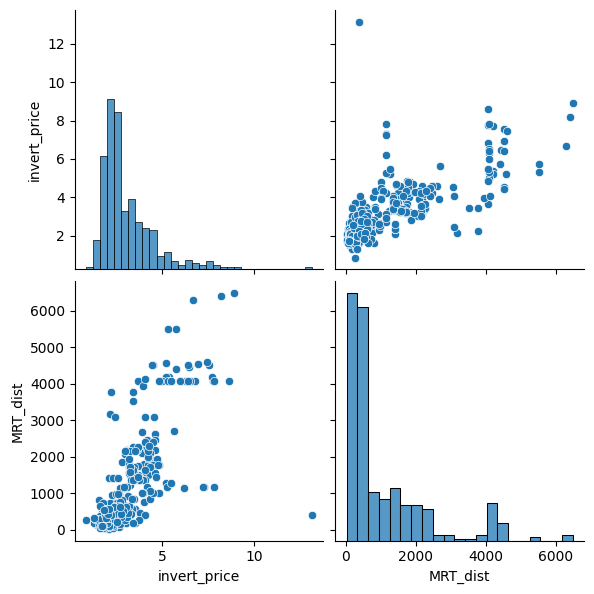

In [12]:
corr_matrix = df.corr()
abs(corr_matrix.loc["invert_price", "MRT_dist"]) > abs(corr_matrix.loc["price", "MRT_dist"])

sns.pairplot(df[["invert_price", "MRT_dist"]], height=3)
plt.show()

In [13]:
utl = df.invert_price.max()
df = df[df.invert_price < utl].copy()

model = smf.ols("invert_price ~ MRT_dist + stores + age + year + latitude + longitude", data=df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           invert_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     195.8
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          1.71e-116
Time:                        17:39:58   Log-Likelihood:                -431.50
No. Observations:                 413   AIC:                             877.0
Df Residuals:                     406   BIC:                             905.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1642.5058    496.579      3.308      0.0

In [14]:
significance_level = 0.05
results.pvalues < significance_level

Intercept     True
MRT_dist      True
stores        True
age           True
year          True
latitude      True
longitude    False
dtype: bool

In [15]:
results.condition_number > 1000

True

In [16]:
df["MRT_dist"] = df["MRT_dist"] / 1000
df["year"] = df["year"] - df["year"].min()
df["latitude"] = (df["latitude"] - df["latitude"].min()) * 100
df["longitude"] = (df["longitude"] - df["longitude"].min()) * 100
df.describe()

,age,MRT_dist,stores,latitude,longitude,price,year,invert_price
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,17.719613,1.085558,4.089588,3.697777,5.981956,38.053753,0.694915,3.048990
std,11.405397,1.263181,2.947636,1.242002,1.536400,13.540320,0.461002,1.358918
min,0.000000,0.023383,0.000000,0.000000,0.000000,11.200000,0.000000,0.851064
25%,9.000000,0.289325,1.000000,3.096000,5.407000,27.700000,0.000000,2.145923
50%,16.100000,0.492231,4.000000,3.903000,6.510000,38.500000,1.000000,2.597403
75%,28.200000,1.455798,6.000000,4.539000,6.978000,46.600000,1.000000,3.610108
max,43.800000,6.488021,10.000000,8.252000,9.274000,117.500000,1.000000,8.928571


In [17]:
model = smf.ols("invert_price ~ MRT_dist + stores + age + year + latitude", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           invert_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     235.0
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          1.46e-117
Time:                        17:40:43   Log-Likelihood:                -431.83
No. Observations:                 413   AIC:                             875.7
Df Residuals:                     407   BIC:                             899.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5631      0.176     20.223      0.0

In [18]:
results.condition_number < 1000

True

In [19]:
results.rsquared > 0.7

True

In [20]:
results.pvalues < significance_level

Intercept    True
MRT_dist     True
stores       True
age          True
year         True
latitude     True
dtype: bool

In [21]:
results.params > 0

Intercept     True
MRT_dist      True
stores       False
age           True
year         False
latitude     False
dtype: bool

## FINAL SUMMARY
    The distance to the next MRT station significantly influences house prices. 
    A lower distance leads to a higher price (most likely).

    The number of convenience stores in the living circle on foot significantly influences house prices. 
    A higher number leads to a higher price (most likely).

    The house age significantly influences house prices. 
    A lower age leads to a higher price (most likely).

    The transaction year significantly influences house prices. 
    Prices increased from 2012 to 2013. This is in line with rising house prices over time. 

    The latitude significantly influences house prices. The more to the northern part of the city, the higher the price. 
    This means, the closer to the seaside/coast, the higher the price (most likely).

    The longitude does not significantly influence house prices. 